## <span style="color:blue"> 彩色與灰階影像表示方式 </span>
1. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_COLOR)載入一張3通道彩色影像(cv2.IMREAD_COLOR為訂定參數)。
2. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_GRAYSCALE)載入一張1通道灰階影像。
3. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_UNCHANGED)視影像檔格式載入影像。

下面程式載入一張彩色影像。

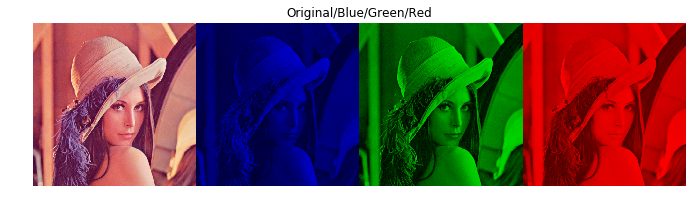

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('./test_data/lenna.png')
if img1 is None:
    print('lenna.png is not found')
img = np.zeros((img1.shape[0],img1.shape[1]*4,3),dtype=np.uint8)
img[:,0:img1.shape[1],:]                 = img1        # the original image is a three-channel image
img[:,  img1.shape[1]:2*img1.shape[1],0] = img1[:,:,0] # channel 0: blue
img[:,2*img1.shape[1]:3*img1.shape[1],1] = img1[:,:,1] # channel 1: green
img[:,3*img1.shape[1]:,2]                = img1[:,:,2] # channel 2: red
plt.figure(figsize=(12,3))
plt.imshow(img[:,:,[2,1,0]])
plt.title('Original/Blue/Green/Red'), plt.axis('off')
plt.show()

下面程式載入一張灰階影像。

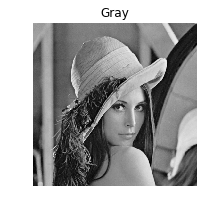

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(3,3))
plt.imshow(img1, cmap='gray')       # use the gray colormap
plt.title('Gray'), plt.axis('off')
plt.show()

## <span style="color:blue"> 頻率域影像表示方式 </span>
可以使用numpy.fft.fft2或cv2.dft將影像用Fourier transform轉換到頻率域，有利於某些分析。不過cv2.dft會快一些。

np.fft.fft2+ifft2: 0.02700 seconds
cv2.dft+idft: 0.00000 seconds


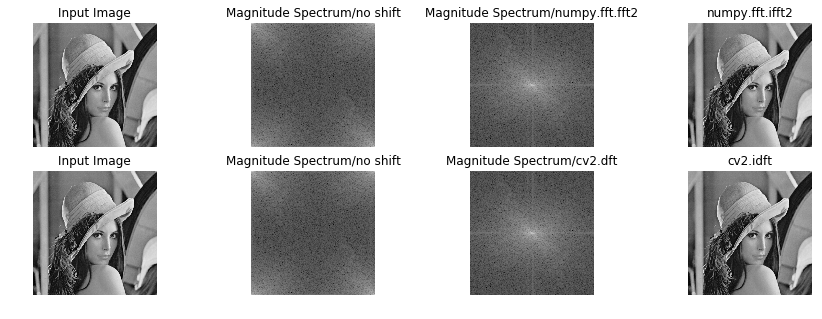

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

img = cv2.imread('./test_data/lenna.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15,5))

# using numpy.fft.fft2
a1 = time.time()
f = np.fft.fft2(img)                            # produce complex numbers
ifft_f = np.fft.ifft2(f)
print('np.fft.fft2+ifft2: {:.5f} seconds'.format(time.time()-a1))

fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(2,4,1),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')        #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,2),plt.imshow(np.log(np.abs(f)), cmap = 'gray')
plt.title('Magnitude Spectrum/no shift'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,3),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum/numpy.fft.fft2'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,4),plt.imshow(np.real(ifft_f), cmap = 'gray')
plt.title('numpy.fft.ifft2'), plt.axis('off') #plt.xticks([]), plt.yticks([])

# using cv2.dft
a1 = time.time()
f = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
ifft_f = cv2.idft(f)
print('cv2.dft+idft: {:.5f} seconds'.format(time.time()-a1))

fshift = np.fft.fftshift(f) 
magnitude_spectrum = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

plt.subplot(2,4,5),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')        #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,6),plt.imshow(np.log(cv2.magnitude(f[:,:,0],f[:,:,1])), cmap = 'gray')
plt.title('Magnitude Spectrum/no shift'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,7),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum/cv2.dft'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,8),plt.imshow(np.abs(ifft_f[:,:,0]), cmap = 'gray')
plt.title('cv2.idft'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.show()


## <span style="color:blue"> 階層式影像表示方式 </span>
常見的階層式影像表示方式如下:

1. 高斯階層式影像表示方式
2. 拉普拉斯階層式影像表示方式
3. 小波階層式影像表示方式

下面函式show_pyramid將img_list每張影像貼在一張更大的影像一次顯示出來，會被接下來的範例呼叫。

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_pyramid(img_list):
    height = 0
    width  = 0
    for img in img_list:
        height += img.shape[0]
        width   = max([width,img.shape[1]])
    disp_img = np.zeros((height, width, 3),dtype=np.float32)
    disp_img[:]=255
    h = 0
    for img in reversed(img_list):
        disp_img[h:h+img.shape[0],0:img.shape[1],[2,1,0]] = np.float32(img)
        h += img.shape[0]
    
    plt.imshow(np.abs(disp_img)/255)
    return  

### <span style="color:blue">使用cv2.pryUp與cv2.pryDown製作高斯與拉普拉斯階層式影像表示方式</span>
cv.pyrDown會將影像先做高斯模糊後再縮小影像。

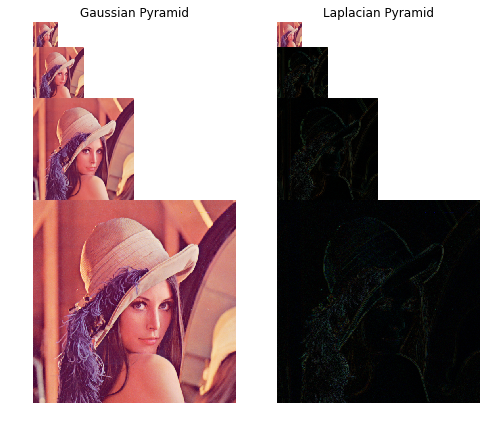

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread('./test_data/lenna.png')
if img0 is None:
    print('lenna.png is not found')
    
level = 4

img1 = img0.copy()
    
plt.figure(figsize=(8,12))    

# Gaussian Pyramid
img_list = [img1]
for i in range(1,level): 
    img1 = cv2.pyrDown(img1,(img1.shape[1]//2,img1.shape[0]//2))
    img_list.append(img1)
    
plt.subplot(1,2,1),show_pyramid(img_list),plt.title('Gaussian Pyramid'), plt.axis('off')

# Laplacian Pyramid
img1 = img0.copy()
img_list=[]
for i in range(1,level):        
    img2 = cv2.pyrDown(img1,(img1.shape[1]//2,img1.shape[0]//2))   
    img_list.append(np.float32(img1)-np.float32(cv2.pyrUp(img2,img1.shape)))        
    img1 = img2
else:
    img_list.append(np.float32(img1))
        
plt.subplot(1,2,2),show_pyramid(img_list),plt.title('Laplacian Pyramid'),plt.axis('off')
plt.show()

### <span style="color:blue">使用cv2.GaussianBlur與cv2.resize製作高斯與拉普拉斯階層式影像表示方式</span>
下面示範用cv2.GaussianBlur與cv2.resize製作高斯與拉普拉斯階層式表示方式。因為用cv2.GaussianBlur，因此可以改變高斯模糊程度。

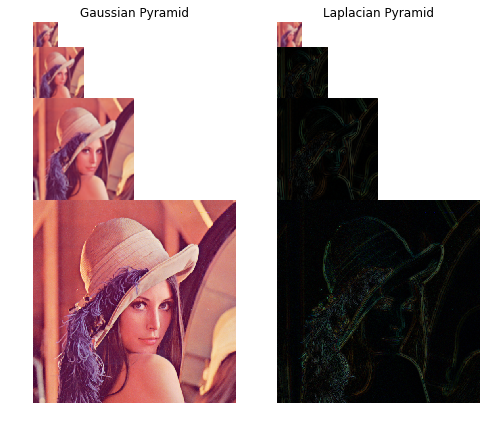

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread('./test_data/lenna.png')

level = 4
plt.figure(figsize=(8,12))

# Gaussian Pyramid    
img1 = img0.copy()    
img_list=[img1]
for i in range(1,level): 
    img1 = cv2.resize(cv2.GaussianBlur(img1,(9,9),9,9),(img1.shape[1]//2,img1.shape[0]//2))
    img_list.append(img1)
    
plt.subplot(1,2,1),show_pyramid(img_list),plt.title('Gaussian Pyramid'),plt.axis('off')

# Laplacian Pyramid
img1 = img0.copy()  
img_list=[]
for i in range(1,level):        
    img2 = cv2.resize(cv2.GaussianBlur(img1,(9,9),9,9),(img1.shape[1]//2,img1.shape[0]//2))   
    img_list.append(np.float32(img1)-np.float32(cv2.resize(img2,img1.shape[0:2])))        
    img1 = img2
else:
    img_list.append(np.float32(img1))
    
plt.subplot(1,2,2),show_pyramid(img_list),plt.title('Laplacian Pyramid'),plt.axis('off')
plt.show()

## <span style="color:blue">使用Deep features</span>
某些應用可以使用深度學習所得到的特徵，一般稱為Deep features。下面示範如何取得輸入影像在VGG16某些Layer的輸出，作為輸入影像的Deep features。下圖是ImageNet-VGG16的結構。
[comment]: <> (!["ImageNet-VGG16"](ImageNetVGG16.png))
<figure><img src="./pic/ImageNetVGG16.png" alt="ImageNet-VGG16"/><figcaption>ImageNet-VGG16結構</figcaption></figure>

In [25]:
import os
       
# Make Keras use the TensorFlow backend. This statement must be executed before importing Keras.
if 'KERAS_BACKEND' in os.environ and os.environ['KERAS_BACKEND'] != 'tensorflow':
    os.environ['KERAS_BACKEND'] = 'tensorflow'

import numpy as np
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline 
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications.vgg16 import preprocess_input

vgg16_model = VGG16() # create a VGG16 DCNN
vgg16_model.summary() # show the structure of the VGG16

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

根據VGG16定義一個模型:輸入為model.input,輸出為'fc2'的輸出。此模型將用來抽取輸入影像之fc2 deep features。

In [26]:
deep_feat = Model(inputs = vgg16_model.input,outputs=vgg16_model.get_layer('fc2').output)

如果也想辨識，又不希望VGG16執行兩次，那麼就建一個Model將fc2的輸出餵入'predictions'那層的輸入。

In [ ]:
input_deep_feat = Input(shape=(4096,))
classifier = Model(inputs=input_deep_feat,outputs=vgg16_model.get_layer('predictions')(input_deep_feat))

顯示這兩個模型的架構

In [34]:
deep_feat.summary()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

載入測試影像

(-0.5, 223.5, 223.5, -0.5)

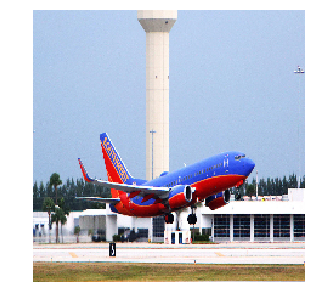

In [27]:
srcfile="./test_data/airport2.jpg"

img1 = cv2.resize(cv2.imread(srcfile),(224,224))
plt.figure(figsize = (5, 5))
plt.imshow(img1[:,:,::-1])
plt.axis('off')

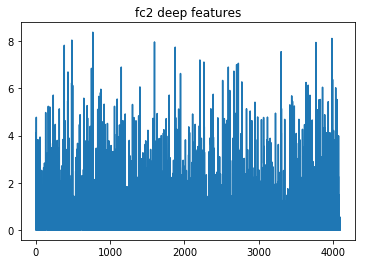

In [32]:
# extract fc2 deep features
deep_feature = deep_feat.predict(preprocess_input(np.expand_dims(np.asarray(img1,dtype=np.float), axis= 0))).ravel()
plt.title('fc2 deep features')
plt.plot(deep_feature)
plt.show()

In [29]:
# classify the input image
preds = classifier.predict(deep_feature.reshape(1,-1))
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 96.58%
2. wing: 1.33%
3. warplane: 0.40%
4. airship: 0.34%
5. missile: 0.14%


下面示範抽取'block4_pool' deep features。

In [33]:
# extract block4_pool deep feature
block4_pool_feat = Model(inputs = vgg16_model.input,outputs=vgg16_model.get_layer('block4_pool').output)

# connect the layers from the block4_pool layer to the predictions layer
block4_pool_deep_feat = Input(shape=(14,14,512))
x = vgg16_model.get_layer('block5_conv1')(block4_pool_deep_feat)
x = vgg16_model.get_layer('block5_conv2')(x)
x = vgg16_model.get_layer('block5_conv3')(x)
x = vgg16_model.get_layer('block5_pool')(x)
x = vgg16_model.get_layer('flatten')(x)
x = vgg16_model.get_layer('fc1')(x)
x = vgg16_model.get_layer('fc2')(x)
classifier2 = Model(inputs=block4_pool_deep_feat,outputs=vgg16_model.get_layer('predictions')(x))
block4_pool_feat.summary()
classifier2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

定義完架構後，以後對輸入影像執行下面步驟即可抽取block4_pool deep feature及辨識其類別。

In [31]:
# extrack block4_pool deep features
block4_pool_deep_feature = block4_pool_feat.predict(preprocess_input(np.expand_dims(np.asarray(img1,dtype=np.float), axis= 0))).ravel()

preds = classifier2.predict(block4_pool_deep_feature.reshape(1,14,14,512))
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 96.58%
2. wing: 1.33%
3. warplane: 0.40%
4. airship: 0.34%
5. missile: 0.14%
